In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\angel\Anaconda\envs\dataanalytics\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_gr_da = df[(df['job_country'] == 'Greece') & (df['job_title_short'] == 'Data Analyst')].copy()
df_gr_da = df_gr_da.dropna(subset='salary_year_avg')

In [3]:
df_gr_da_exploded = df_gr_da.explode('job_skills')

In [7]:
df_da_skills = df_gr_da_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)
df_da_skills = df_da_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})
df_da_skills['skill_percent'] = df_da_skills['skill_count'] / len(df_gr_da) * 100

skill_limit = 10

df_da_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_limit]
df_da_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,8,98500.0,50.00
python,8,119500.0,50.00
tableau,4,81000.0,25.00
power bi,4,98500.0,25.00
flow,4,94800.0,25.00
java,3,140904.5,18.75
azure,3,98500.0,18.75
excel,2,76757.0,12.50
sas,2,98500.0,12.50


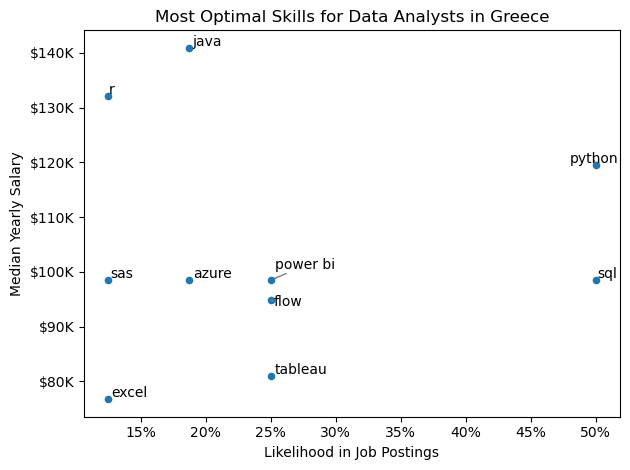

In [17]:
from adjustText import adjust_text

df_da_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_da_high_demand.index):
    texts.append(plt.text(df_da_high_demand['skill_percent'].iloc[i], df_da_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Likelihood in Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in Greece')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

In [18]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['visio',
  'ssrs',
  'dax',
  'sas',
  'powerbi',
  'outlook',
  'esquisse',
  'ssis',
  'datarobot',
  'looker',
  'excel',
  'ms access',
  'powerpoint',
  'sap',
  'sheets',
  'word',
  'spss',
  'qlik',
  'tableau',
  'power bi',
  'spreadsheet',
  'cognos',
  'microstrategy',
  'sharepoint',
  'splunk',
  'msaccess',
  'nuix',
  'alteryx'],
 'programming': ['r',
  'haskell',
  'bash',
  'nosql',
  'no-sql',
  'objective-c',
  'ocaml',
  'typescript',
  'sas',
  'cobol',
  'vb.net',
  'vba',
  'ruby',
  'f#',
  'mongo',
  'groovy',
  'shell',
  'go',
  'perl',
  'javascript',
  'lisp',
  'julia',
  'html',
  'visualbasic',
  'dart',
  'java',
  'fortran',
  't-sql',
  'pascal',
  'swift',
  'rust',
  'php',
  'c#',
  'css',
  'assembly',
  'powershell',
  'delphi',
  'c',
  'c++',
  'visual basic',
  'lua',
  'sass',
  'kotlin',
  'apl',
  'golang',
  'python',
  'elixir',
  'erlang',
  'solidity',
  'sql',
  'crystal',
  'matlab',
  'scala',
  'mongodb',
  'cloj

In [21]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,visio
0,analyst_tools,ssrs
0,analyst_tools,dax
0,analyst_tools,sas
0,analyst_tools,powerbi
...,...,...
9,sync,rocketchat
9,sync,wire
9,sync,webex
9,sync,symphony


In [25]:
df_plot = df_da_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot = df_plot.set_index('skills')

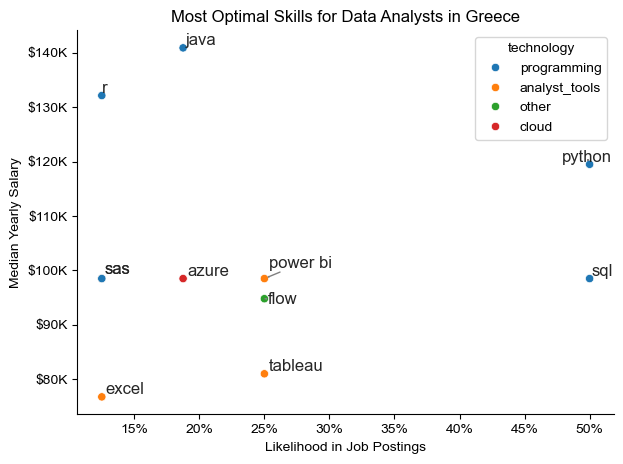

In [28]:
# df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.set_theme(style='ticks')
sns.despine()

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot['skill_percent'].iloc[i], df_plot['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Likelihood in Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in Greece')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()